In [1]:
import numpy as np

# 벡터화 연산

In [2]:
data = np.array([1,2,3,4])
data==4

array([False, False, False,  True])

* __Fancy Indexing__

In [8]:
names = np.array(['Bob','Joe','Bob','Will'])
data = np.random.randn(4,4)

In [9]:
# boolean reference
data[names=='Bob',2:]

array([[-0.95402283, -0.70756744],
       [-0.12192656,  0.67776787]])

In [10]:
data[data<0]=0 # 한번에 ... 와우
data

array([[0.        , 0.21131849, 0.        , 0.        ],
       [0.        , 0.65350919, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.67776787],
       [0.58558011, 0.        , 1.21039718, 1.4733375 ]])

In [11]:
data[names!='Bob']=10
data

array([[ 0.        ,  0.21131849,  0.        ,  0.        ],
       [10.        , 10.        , 10.        , 10.        ],
       [ 0.        ,  0.        ,  0.        ,  0.67776787],
       [10.        , 10.        , 10.        , 10.        ]])

In [14]:
arr=np.empty((8,4))
for i in range(8):
    arr[i]=i
arr[[4,3]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.]])

In [16]:
arr2 = arr.T
arr2

array([[0., 1., 2., 3., 4., 5., 6., 7.],
       [0., 1., 2., 3., 4., 5., 6., 7.],
       [0., 1., 2., 3., 4., 5., 6., 7.],
       [0., 1., 2., 3., 4., 5., 6., 7.]])

In [22]:
#sklearn : 머신러닝 알고리즘들이 구현되어 있는 패키지(싸이킷런)
from sklearn.datasets import load_iris

iris = load_iris()
np.shape(iris['data'])  # 각 행 (꽃 받침 너비,높이 + 꽃 잎 너비,높이)
                        # iris['target']=꽃 종류 분류 숫자 0~2
iris.data[0,:]

array([5.1, 3.5, 1.4, 0.2])

In [24]:
# 벡터 = 여러 숫자가 특정한 순서대로 모여 있는 것
# 사이킷런에서 벡터를 정의하고자 한다 -> 열의 개수가 1인 2차원 배열로 표현해야함

* 분류/예측 모델 : 

In [30]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.target.shape
print(digits.data[600].reshape(8,8))
print(digits.target[600])

[[ 0.  0. 10. 15.  2.  0.  0.  0.]
 [ 0.  7. 16. 16.  6.  0.  0.  0.]
 [ 0. 12. 13. 12.  9.  0.  0.  0.]
 [ 0.  8.  9. 13.  7.  0.  0.  0.]
 [ 0.  0.  0. 16.  5.  0.  0.  0.]
 [ 0.  0.  6. 15.  1.  0.  0.  0.]
 [ 0.  0. 16. 14.  4.  5.  8.  3.]
 [ 0.  0.  8. 16. 16. 16. 16.  9.]]
2


In [39]:
d=[]
samples=[0,10,20,30,1,11,21,68]
for i in samples:
    d.append(digits.images[i])

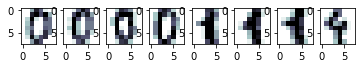

In [40]:
import matplotlib.pyplot as plt

for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(d[i],cmap=plt.cm.bone_r)

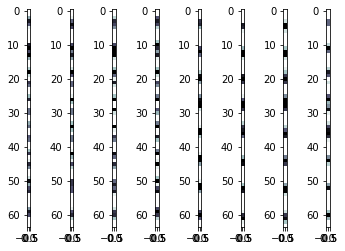

In [41]:
vec=[]
for i in range(8):
    vec.append(d[i].reshape(64,1))
for i in range(8):    
    plt.subplot(1,8,i+1)
    plt.imshow(vec[i],cmap=plt.cm.bone_r)

In [45]:
d1=digits.data[0].reshape(8,8)
d2=digits.data[10].reshape(8,8)
d3=digits.data[1].reshape(8,8)
d4=digits.data[11].reshape(8,8)
v1=d1.reshape(64,1)
v2=d2.reshape(64,1)
v3=d3.reshape(64,1)
v4=d4.reshape(64,1)

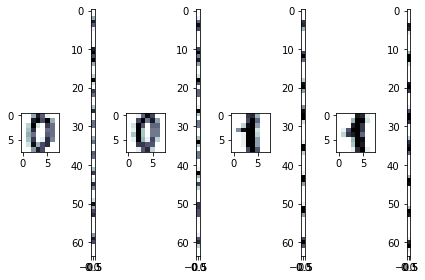

In [47]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(1,8,height_ratios=[1],width_ratios=[9,1,9,1,9,1,9,1])

for i in range(4):
    plt.subplot(gs[2*i])
    plt.imshow(eval('d'+str((i+1))),cmap=plt.cm.bone_r)
    plt.subplot(gs[2*i+1])
    plt.imshow(eval('v'+str((i+1))),cmap=plt.cm.bone_r)
plt.tight_layout()
plt.show()

* 내적 : 요소 by 요소 = 유사도 = v.T@(w)

In [52]:
Dot_results=[]
for i in range(2,5):
    Dot_results.append(int((v1.T@eval('v'+str(i)))[0][0]))
Dot_results

[3064, 1866, 1883]

In [58]:
a=np.arange(12)
print(a[::2])
print(a[a%2==0])

[ 0  2  4  6  8 10]
[ 0  2  4  6  8 10]


In [60]:
idx=np.array([0,1,0,1,0,0,0,2])
b=np.array([2,3,4,5])
b[idx]                         # holy moly sweet reference method

array([2, 3, 2, 3, 2, 2, 2, 4])

나중에 RNN 실습과정에서 다루게 될것.  
  
ex)  
1. I like python  
2. I like DL  
3. DL is AI  
=> 문서 단어를 데이터화 시켜야함 => 벡터공간 (임베딩)  
  
원핫 인코딩 (임베딩 예시)  
단어:  
I        =>  1 0 0 0 0 0  
like     =>  0 1 0 0 0 0  
python   =>  0 0 1 0 0 0  
DL       =>  0 0 0 1 0 0  
is       =>  0 0 0 0 1 0  
AI       =>  0 0 0 0 0 1  
'I like python' = [[100000],[010000],[001000]]  
'I like DL'     = [[100000],[010000],[000100]]  
'DL is AI'      = [[000100],[000010],[000001]]  

문서 사이의 유사도를 유클리드 공간 내의 거리로부터 추측

In [61]:
# ndarray : 배열 내에 모두 같은 타입의 자료가 포함되어야 한다.

x=np.array([1,2,3.0])
x.dtype # 형 변환           # dtype=b,i,u,f,


dtype('float64')

In [64]:
# numpy 활용에서 자주 마주치는 문제
num = np.inf
num2 = np.nan
print(num,num2)

inf nan


In [65]:
print(np.array([0,1,-1,0])/np.array([1,0,0,0]))
print(np.exp(-np.inf))

[  0.  inf -inf  nan]
0.0


<ipython-input-65-caee92429bbb>:1: RuntimeWarning: divide by zero encountered in true_divide
  print(np.array([0,1,-1,0])/np.array([1,0,0,0]))
<ipython-input-65-caee92429bbb>:1: RuntimeWarning: invalid value encountered in true_divide
  print(np.array([0,1,-1,0])/np.array([1,0,0,0]))


* 유니버셜 함수 : ndarray 데이터를 원소별로 연산을 수행하는 함수  
    - 스칼라값 전달 -> 스칼라값 리턴하는 벡터화된 래퍼런스 함수

In [68]:
arr = np.arange(10)
np.sqrt(arr)
# np.maximum(x,y)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [69]:
arr=np.random.randn(7)*5
print(arr)
remainder,whole_part = np.modf(arr)
print(remainder)
print(whole_part)

[ 1.68052435  1.50021308 -1.02319815 -8.63549268  3.30668697  0.7182425
 -1.66084057]
[ 0.68052435  0.50021308 -0.02319815 -0.63549268  0.30668697  0.7182425
 -0.66084057]
[ 1.  1. -1. -8.  3.  0. -1.]


In [70]:
np.ones((2,3,4),dtype='i8')

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int64)

In [72]:
x=np.zeros((3,4))
y=np.ones_like(x)
z=np.zeros(x.shape)
print(y)
print(z)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [75]:
# empty : 배열 생성만 진행, 초기화는 진행하지 않는 함수

a=np.empty((3,4))

In [77]:
print(np.arange(0,10,2))
print(np.linspace(0,10,2))  # linspace 에서 마지막 인자는 개수 의미 , 끝값은 포함

[0 2 4 6 8]
[ 0. 10.]


In [82]:
a=np.arange(12)
print(a.reshape(3,-1))
print('='*20)
print(a.reshape(2,-1,2))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]


In [83]:
a=a.reshape(3,4)
print(a)
a=a.flatten() # 다 차원=> 벡터화  , ※ == ravel()
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [86]:
# 차원 증가 함수 : newaxis

x=np.arange(5)
print(x)
x[:,np.newaxis]

[0 1 2 3 4]


array([[0],
       [1],
       [2],
       [3],
       [4]])

In [88]:
from sklearn.datasets import fetch_olivetti_faces as fof

face_data = fof()
print(face_data.keys())

dict_keys(['data', 'images', 'target', 'DESCR'])


In [90]:
print(face_data.data.shape)
print(face_data.images.shape)

(400, 4096)
(400, 64, 64)


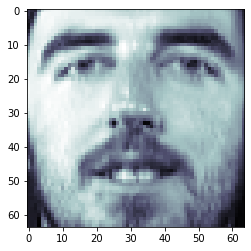

In [98]:
plt.imshow(face_data.images[100],cmap=plt.cm.bone)

In [114]:
import os
import cv2

image_w = 64
image_h = 64
image_dir='C:/Users/i/Desktop/execute_files/'
filename='resume.jpg'
img = cv2.imread(image_dir+filename)
#print(img)
print(img.shape)
img = cv2.resize(img, None, fx=image_w/img.shape[1], fy=image_h/img.shape[0])

#print(img/256)
print(img.shape)
tmp = img[:,:,0]
tmp=tmp/256
tmp=tmp.flatten()
tmp.shape
# for idex, categorie in enumerate(categories):
#     label = [0 for i in range(num_classes)]
#     label[idex] = 1
#     image_dir = groups_folder_path + categorie + '/'
  
#     for top, dir, f in os.walk(image_dir):
#         for filename in f:
#             print(image_dir+filename)
#             img = cv2.imread(image_dir+filename)
#             img = cv2.resize(img, None, fx=image_w/img.shape[0], fy=image_h/img.shape[1])
#             X.append(img/256)
#             Y.append(label)
 
# X = np.array(X)
# Y = np.array(Y)


# 출처: https://twinw.tistory.com/252 [흰고래의꿈]
        
#         imread(image_dir+filename)
#             img = cv2.resize(img, None, fx=image_w/img.shape[0], fy=image_h/img.shape[1])
#             X.append(img/256)


# 출처: https://twinw.tistory.com/252 [흰고래의꿈]

(472, 354, 3)
(64, 64, 3)


(4096,)

In [117]:
import site 
print(site.getsitepackages())

['C:\\ProgramData\\Anaconda3', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages']


In [119]:
import cv2

face_cascade = cv2.CascadeClassifier('C:/ProgramData/Anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml')

src = cv2.imread('C:/Users/i/Desktop/execute_files/resume.jpg')
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(src_gray,1.1,3)

for x, y, w, h in faces:
    face_gray = src_gray[y: y + h, x: x + w]

cv2.imwrite('C:/Users/i/Desktop/execute_files/test.jpg', face_gray)

True